In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyplr.stlabhelp import get_led_colors
from pysilsub.device import StimulationDevice


# STLAB calibrations

In [2]:
S1 = StimulationDevice.from_json('../bin/STLAB_1_config.json')
S2 = StimulationDevice.from_json('../bin/STLAB_2_config.json')

# Spectra comparison

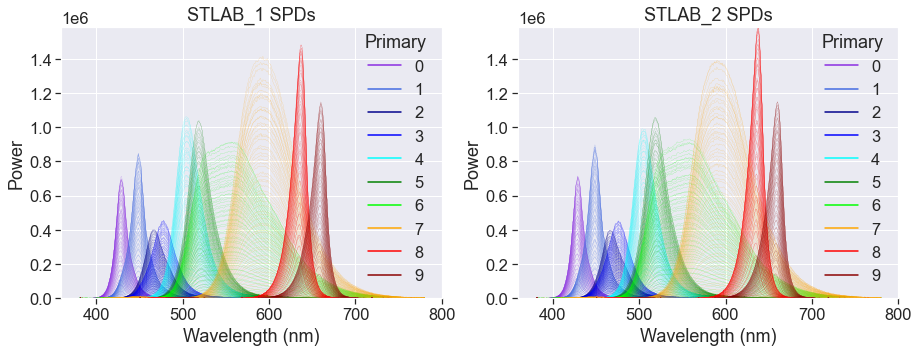

In [3]:
plt.style.use('seaborn-darkgrid')
sns.set_context('notebook', font_scale=1.5)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

S1.plot_spds(ax=axs[0])
S2.plot_spds(ax=axs[1])

ymax = max([S1.spds.max().max(), S2.spds.max().max()])

for ax in axs:
    ax.set_ylim((0, ymax))

# $\lambda$-max comparison

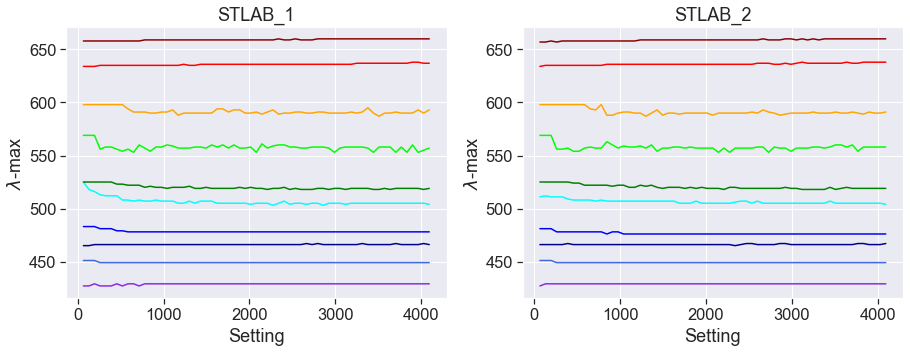

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

S1_lmax = S1.spds.idxmax(axis=1)
S2_lmax = S2.spds.idxmax(axis=1)

leds = range(0, 10)

for led, color in zip(leds, get_led_colors()):
    axs[0].plot(S1_lmax.loc[led][1:], c=color)
    axs[1].plot(S2_lmax.loc[led][1:], c=color)

axs[0].set_title('STLAB_1')
axs[1].set_title('STLAB_2')

for ax in axs:
    ax.set_ylabel('$\lambda$-max')
    ax.set_xlabel('Setting')

# Max counts comparison

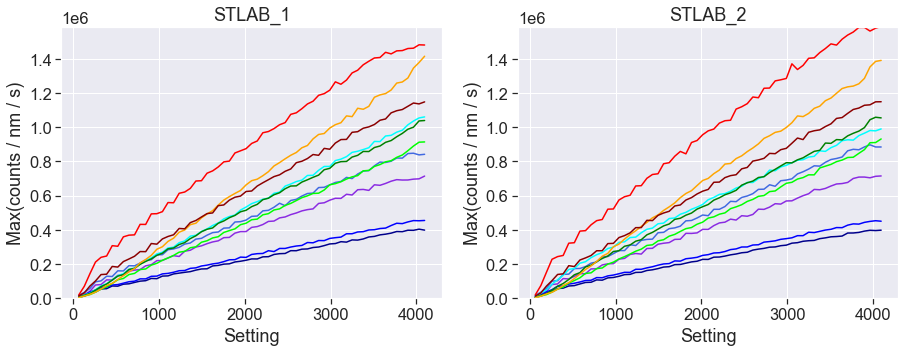

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

S1_max = S1.spds.max(axis=1)
S2_max = S2.spds.max(axis=1)

leds = range(0, 10)

ymax = max([S1_max.max(), S2_max.max()])

for led, color in zip(leds, get_led_colors()):
    axs[0].plot(S1_max.loc[led][1:], c=color)
    axs[1].plot(S2_max.loc[led][1:], c=color)
    
axs[0].set_title('STLAB_1')
axs[1].set_title('STLAB_2')

for ax in axs:
    ax.set_ylabel('Max(counts / nm / s)')
    ax.set_xlabel('Setting')
    ax.set_ylim((0, ymax))

# Half-max comparison

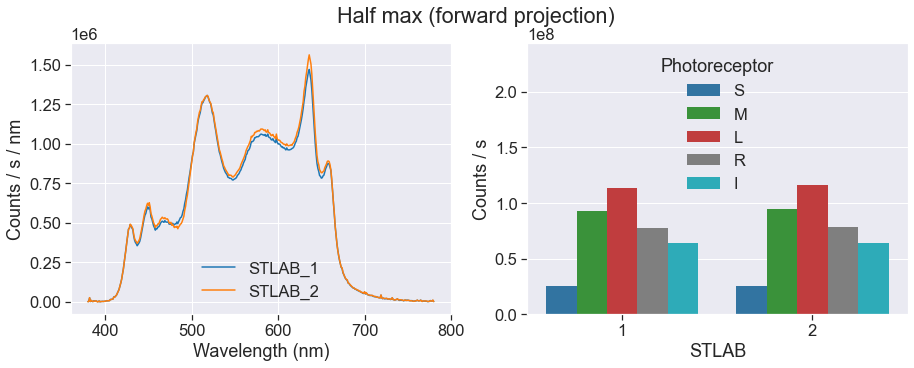

In [6]:
halfmax = [.5]*10

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

bg1 = S1.predict_multiprimary_spd(halfmax).plot(label='STLAB_1', ax=axs[0])
bg2 = S2.predict_multiprimary_spd(halfmax).plot(label='STLAB_2', ax=axs[0])
axs[0].legend()

bg1a = S1.predict_multiprimary_aopic(halfmax).to_frame().reset_index()
bg2a = S2.predict_multiprimary_aopic(halfmax).to_frame().reset_index()
bg1a['STLAB'] = 1
bg2a['STLAB'] = 2
bgs = (pd.concat([bg1a, bg2a], axis=0)
       .melt(id_vars=['Photoreceptor', 'STLAB']))

sns.barplot(x='STLAB', y='value', 
            hue='Photoreceptor', units='STLAB', 
            palette=S1.aopic_colors, 
            data=bgs)

fig.suptitle('Half max (forward projection)');

axs[0].set_ylabel('Counts / s / nm')
axs[0].set_xlabel('Wavelength (nm)')

axs[1].set_ylabel('Counts / s')
axs[1].set_ylim((0, axs[1].get_ylim()[1]*2))
fig.savefig('STLAB_1_2_halfmax.jpg')